# Simple Linear Regression (SLR)
## Specifying the model and assumptions (diagnostics)

## Introduction

Regression is a foundational branch of statistics and contains numerous statistical techniques.
In healthcare and medicine, regression models are typically used to associate some set of covariates with an outcome of interest. For example, "How does decreased creatinine clearance change the probability of a myocardial infarction within on year?" or "How does incresing the percentage of vaccinated individuals change the number of incident cases 4 weeks in the future?". Regression models can help us answer questions like this. 


## Goal

Our goal for week 1 will be to learn:
- Two ways to specify a Simple Linear Regression (A linear regression with one covariate and outcome of interest)
- The format and type of data needed for a SLR
- Understand SLR as a conditional probability
- Understand the assumptions of SLR (LINE assumptions)

# Simple Linear Regression (SLR)

Suppose you're asked whether or not a patient's age increases their chances of a myocardial infarction (heart attack). An ecologist asks you how tree density (trees per square mile) is associated with the number of deer in a county. A stock broker, looking to capitalize on their investment, asks you to relate historical stock price data to predict future prices.

All of these examples relate one random variable to a set of others. Questions like this can begin to be answered with **regression**

Most, if not all regression can be specified in two ways: *Probabilistic form* and *Model form*.
Whether or not you decide to specify a model in PF or MF depends on what aspects of your model you plan to explore and who you plan to communicate the model to. 

## Data format needed for SLR

Data for a Simple Linear Regression should be organized into a [data matrix](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c1/Class01-02.ipynb) with two columns and rows equal to the collected number of observations. 

One column should represent a covariate you hypothesize can explain all, or part, of the behavior of the second column. This first column is called an explanatory variable. The second column is called a reponse variable.

Below is an example data matrix:

$$
    \mathcal{D} = \left [ \begin{array}{cc}
                            X & Y\\
                            \hline
                            x_{1}  & y_{1}  \\
                            x_{2}  & y_{2}  \\
                            x_{3}  & y_{3}  \\
                            \vdots & \vdots \\
                            x_{N}  & y_{N}
                            \end{array} \right ]
$$

where observations are x,y pairs (i.e. one observation is a value associated with x and associated value with y (x,y) ). Data formatted like above is common in statistics and this format of observations as row and coviariates as columns will be used in the majority, if not all, of the semester. 





### Probabilistic form
**Simple Linear Regression** supposes a conditional probability between one random variable (denoted $Y$) and another (denoted $X$) as 

$$
p(Y=y|X=x) \sim N(\beta_{0} + x*\beta_{1},\sigma^2)
$$

The conditional probability of $Y$ is linearly related to $X$ with two parameters: an intercept $(\beta_{0})$ and a slope $(\beta_{1})$. Because we are modeling a [conditional probability](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c4/Class09-11.ipynb), assumptions are placed on $Y$. There are not assumptions placed on $X$. 

When we write a regression model in terms of a conditional probability distribution, it is called **probabilistic form**.
Probabilsitic form highlights the distribution of our variable of interest ($Y$).

In the case of SLR, we expect $Y$ to have a [Normal distribution](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c7/Class18-20.ipynb).


### Model form
Another, often more common, way to specify a simple linear regression is 

\begin{align}
    y     &= \beta_{0} + x*\beta_{1}+\epsilon\\
 \epsilon &\sim N(0,\sigma^{2})
\end{align}

This method of specifying a regression is called **model form**.
Model form highlights the relationship between $Y$ and $X$, focusing less on the distribution of $Y$.
A third variable $\epsilon$ (called epsilon) is introduced in model form and represents the uncertainity about the value of $Y$.

From model form we can more clearly see the assumed relationship between $X$ and $Y$. 

\begin{align}
    y     &= \beta_{0} + x*\beta_{1}
\end{align}

$Y$ is a linear function of $X$ with a slope $(\beta_{1})$ and an intercept $(\beta_{0})$.


## Example: Age and Cholesterol levels among Diabetic patients.

Nineteen variables were collected from 403 patients with diabetes.
Suppose we are interested in whether there is an association between the age of the subject and the concentration of total cholesterol (high density plus low density lipoprotein in their blood).
An association exists between age and total cholesterol could support how physicians advise diabeteic patients who are a certain age. 

We will look at data provided by [Vanderbilt Biostats](https://hbiostat.org/data/).

In [14]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("https://hbiostat.org/data/repo/diabetes.csv")
data

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


Note that the data is in the format we discussed earlier: each row represents a single observation and there are columns for each of the nineteen variables collected (there is a 20th unnamed column called an "index"). 

Though a data matrix may be informative, **a scatter plot** allows us to visually identify whether there is an association between two [numerical continuous variables](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c2/Class03-05.ipynb).

Below is a scatterplot of Age, on the horizontal axis, and Total cholesterol, on the vertical axis, for all 403 patients.

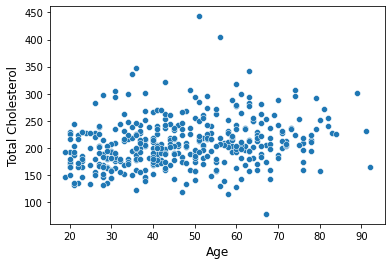

In [13]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("https://hbiostat.org/data/repo/diabetes.csv")

fig,ax = plt.subplots()
sns.scatterplot(x="age",y="chol",data=data,ax=ax)
ax.set_xlabel("Age",fontsize=12)
ax.set_ylabel("Total Cholesterol (mg/dL)",fontsize=12)

plt.show()

We see that a linear relationship between age and total cholesterol

\begin{align}
    \text{total cholesterol} = \beta_{0} + \beta_{1} \text{age}
\end{align}

may be an accurate way of describing the association between these clinical variables. 
A scatter plot allows us to quickly visualize the relationship between two continuous variables.

But before we estimate the parameters of a SLR, we need to examine whether or not our data meets the assumptions of an SLR. These assumptions are often informally called the LINE assumptions.

### LINE assumptions

LINE is an acronym for remebering the most important assumptions present in SLR.

* L - Our response ($Y$) is linearly related to $X$.
* I - The observations $(y_{i},x_{i})$ are independent from one another.
* N - The conditional probability of our response $y$ is normally distributed.
* E - The same $\sigma$ applies to all values of $X$, i.e. and distribution of errors have equal variance.

With a scatter plot we can investigate linearaity and see how the normal dist and "same sigma" assumptions fit with the sample we collected.


## Investigating the LINE assumptions on a dataset

[The California Department of Public Health, Center for Healthcare Quality collected COVID-19 cases data](https://healthdata.gov/dataset/covid-19-skilled-nursing-facility-data) on the number of residents and healthcare workers at skilled nursing facilities (SNFs), and made this data available to the public for analysis. 
The dataset is on the facility level, recording the total number of health care workers who were infected with COVID-19 and the total number of residents at SNFs who were infected with COVID-19. 

The data is collected over time and we can look at data as of 2020-10-31.
Below we will build a scatter plot of the total number of cases among health workers versus the total number of cases among residents.


In [97]:
import pandas as pd
d = pd.read_csv("https://data.chhs.ca.gov/dataset/7759311f-1aa8-4ff6-bfbb-ba8f64290ae2/resource/d4d68f74-9176-4969-9f07-1546d81db5a7/download/covid19datanursinghome.csv")

dataAsOf20201031 = d.loc[d.as_of_date=="2020-10-31",:]

### L assumption
We can test linearity visually by looking at a scatterplot of X vs Y (in our case Total Healthcare worker cases vs Total resident cases) to see if the majority of observations lie long a line.
If most observations lie along a line than the L assumption is satisifed. 

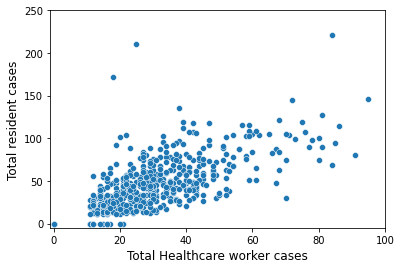

In [166]:
fig,ax = plt.subplots()

sns.scatterplot( x="total_health_care_worker_cases"
                ,y="total_resident_cases"
                ,data=dataAsOf20201031
                ,ax=ax)
ax.set_xlabel("Total Healthcare worker cases", fontsize=12)
ax.set_ylabel("Total resident cases", fontsize=12)

ax.set_xlim(-1,100)
ax.set_ylim(-5,250)

plt.show()

For this dataset, the majority of observations lie along a line and so the **L** assumption is satisifed. 

### I assumption 

To assess independence we need to understand how the data was collected.
If data was collected such that the probability of a specific type of observation depends on observing an additional observation then observations are dependent. 
If, on the other hand, collecting an observation has no impact on the probabilty of observing another observation then the I assumption is satisfied. 

In our example, we have no reason to believe the probability of observing the number of health care workers and residents infected with COVID-19 at one hospital impacts observations at other hospitals.

### N assumption

The N assumption can be visually assessed in two ways: (i) we can estimate the distribution of $\epsilon$ with a histogram and assess normality, and (ii) we can build a QQ-plot. 

#### Histogram

The model form for SLR is specified as 
\begin{align}
    y     &= \beta_{0} + x*\beta_{1}+\epsilon\\
 \epsilon &\sim N(0,\sigma^{2})
\end{align}

The parameter $\epsilon$ must (or approximately) be Normal.
To build a histogram for $\epsilon$ we need to collect observations of $\epsilon$.
For each observation ( i.e. (x_{1},y_{1}),(x_{2},y_{2}), ...,(x_{i},y_{i}),..., (x_{N},y_{N})   ) we can compute an observed $\epsilon$ by manipulating model form above.

\begin{align}
    y     &= \beta_{0} + x*\beta_{1}+\epsilon \; \text{(for each observation)}\\
    y_{i}     &= \beta_{0} + x_{i}*\beta_{1}+\epsilon_{i} \; (\text{adding a subscript i to denote a single observation}) \\
    \epsilon_{i} &= y_{i} - \beta_{0} - x_{i}*\beta_{1}  \; (\text{subtraction}) \\
\end{align}

With an estimate of $\beta_{0}$ and $\beta_{1}$, we can compute each epsilon and then build a [histogram](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c2/Class03-05.ipynb).
For our example, $\beta_{0}$ equals $6.20$ and $\beta_{1}$ equals $1.30$.
The first observation in our dataset is 

In [99]:
import numpy as np

d = dataAsOf20201031[["total_resident_cases","total_health_care_worker_cases"]].dropna()

dataAsOf20201031.iloc[0]

county                                                       Sonoma
facility_id                                                10000005
facility_name                       Windsor Care Center Of Petaluma
as_of_date                                               2020-10-31
total_resident_cases                                           57.0
new_resident_cases                                              0.0
total_resident_deaths                                           NaN
total_health_care_worker_cases                                 22.0
new_health_care_worker_cases                                    0.0
total_health_care_workers_deaths                                0.0
note                                                             c 
Name: 33764, dtype: object

and 
\begin{align}
    \epsilon_{1} &= \text{total resident cases} - 6.20 - 1.30*\text{total health care worker cases}\\
    \epsilon_{1} &= 12 - 6.20 - 1.30*19\\
    \epsilon_{1} &= 12 - 6.20 - 1.30*19\\
    \epsilon_{1} &= -18.7
\end{align}

We can do the same calculation for all observations and look at the histogram (below). 

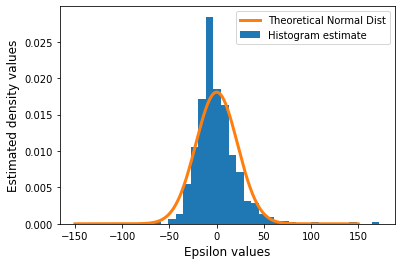

In [161]:
epsilons = d["total_resident_cases"] - 6.20 - 1.30*d["total_health_care_worker_cases"]

fig,ax = plt.subplots()

ax.hist(epsilons,density=True,bins=30, label = "Histogram estimate")

import numpy as np
meaneps = np.mean(epsilons)
sdeps   = np.std(epsilons)

import scipy
normal = scipy.stats.norm(meaneps,sdeps)
domain = np.linspace(-150,150,10**3)

ax.plot( domain, normal.pdf(domain), label="Theoretical Normal Dist", lw=3)

ax.legend()

ax.set_xlabel("Epsilon values",fontsize=12)
ax.set_ylabel("Estimated density values",fontsize=12)

plt.show()

The histogram of $\epsilon$ above looks *reasonably* Normal, though it does look like the theoretical normal distribution assigns higher probabilities closer to the mean (and so smaller probabilities further from the mean).

Another way to visualize the distribution of $\epsilon$ is to draw a Quantile-Quantile, or QQ, plot. 
A QQ-plot compares quantiles from an empirical distribution of a random variable to an estimated theoretical distribution. 

To build a QQ-plot we need to follow the below steps:
1. Compute empirical quantiles (q_{1},q_{2},...) from $\epsilon$ values
2. Estimate parameters for the theoretical distribution
3. For each computed quantile in step 1, compute the theoretical quantiles (t_{1},t_{2},...)
4. Make a scatter plot of (q_{i}, t_{i})
5. Draw a "t=q" line. 

#### Step 1:
The $q^{\text{th}}$ [quantile]() of a random variable ($X$) is the value ($v$) where the probability that $X$ is less than $v$ equals $q$. In otherwords, the value $v$ such that 

\begin{align}
    p(X<v) = q
\end{align}

Given a dataset of $N$ observations of $X$, we can estimate $p(X<v)$ as the number of values in our dataset that are less than $v$ divided by $N$, the total number of observations or $\left(\frac{\text{Num}(\text{values} < v )}{N}\right)$. This means the smallest quantile we can estimate is the 1/N$^{\text{th}}$ quantile. The next smallest quantile we can estimate is the $2/N^{\text{th}}$ quantile.
An estimate of the $1/N^{\text{th}}$ quantile is the smallest value in our dataset. We can estimate the $2/N$ quantile as the second smallest value, and so on. 

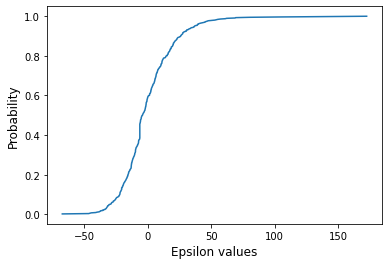

In [154]:
N = len(epsilons)
estimatedQuantiles = np.arange(1.,N+1)/N
estimatedQuantileValues = sorted(epsilons)

fig,ax = plt.subplots()
ax.plot( estimatedQuantileValues, estimatedQuantiles )

ax.set_xlabel("Epsilon values",fontsize=12)
ax.set_ylabel("Probability"   ,fontsize=12)

plt.show()

#### Step 2: Estimate parameters for the theoretical distribution

We want to compare our empirical epislon quantiles to quantiles from an exact Normal distribution. 
A Normal distribution has two parameters: $\mu$ and $\sigma$ that we need to estimate from our data. 

An estimate of the true mean (we use a "hat" to mean estimated) for a Normal distribution is the average. 
\begin{align}
    \hat{\mu} = \frac{\sum_{i=1}^{N} \epsilon_{i}}{N}
\end{align}

An estimate of the variance $(\sigma^{2})$ is the average squared difference between epsilon values and the average, or 
\begin{align}
    \hat{\sigma^{2}} = \frac{\sum_{i=1}^{N} \left(\epsilon_{i} - \hat{\mu}\right)^{2}}{N}
\end{align}
and an estimate of the standard deviation $(\hat{\sigma})$ is the square root of the estimated variance. 

In [155]:
MeanEpsilon = np.mean(epsilons)
SdEpsilon   = np.std(epsilons)

print("Mean Epsilon = {:.2f}".format(MeanEpsilon))
print("SD   Epsilon = {:.2f}".format(SdEpsilon))

Mean Epsilon = 0.08
SD   Epsilon = 22.06


#### Step 3: Compute Theoretical quantiles

With estimates of $\mu$ and $\sigma$ for our theoretical ("perfect") normal distribution we can compute the same quantile values from our theoretical distribution that we computed for our empirical distribution. 

In [156]:
import scipy

TheoreticalDist = scipy.stats.norm(MeanEpsilon,SdEpsilon)
TheoreticalQuantileValues = TheoreticalDist.ppf(estimatedQuantiles)

#### Step 4: Make a Scatter plot of Quantiles and Step 5 (put in a q=t line)

The final two steps (we made it!) are to plot a scatter plot of the quantiles values for the theoretical distribution against the quantiles values for our empricial distribution. The final step is to place a line where the theroetical and empirical quantiles are equal---the line where our empiricial distribution would line up perfectly with our theoretical distribution. 

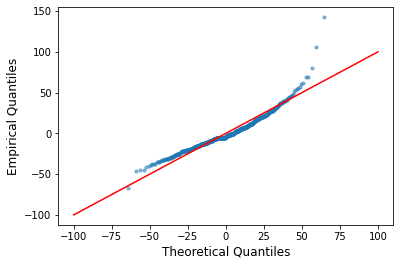

In [158]:
fig,ax = plt.subplots()

ax.scatter(TheoreticalQuantileValues,estimatedQuantileValues, alpha=0.5,s=10)
ax.plot([-100,100],[-100,100],color="red")

ax.set_xlabel("Theoretical Quantiles",fontsize=12)
ax.set_ylabel("Empirical Quantiles",fontsize=12)

plt.show()

Our first observation is that our quantile values (the blue dots above) don't line up great with the red (perfect) line, indicating that our residuals may not be normally distributed.
Because the QQ-plot has values under the T=Q (red) line, the QQ-plot shows us our residuals are [right-skewed](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c2/Class03-05.ipynb?flush_cache=false#Symmetry-and-skew). 

But why? 

To learn about what a QQ-plot tells us about an empirical distribution we can simulate some data with different properties and look at the resulting QQ-plot. We can generate data that (i) is left skewed, (ii) is right skewed, (iii) has "fat" tails (a distribution that assigns higher probabilities than you would expect to values far from the mean) and (iv) has thin tails (opposite of a fat-taild distribution).  


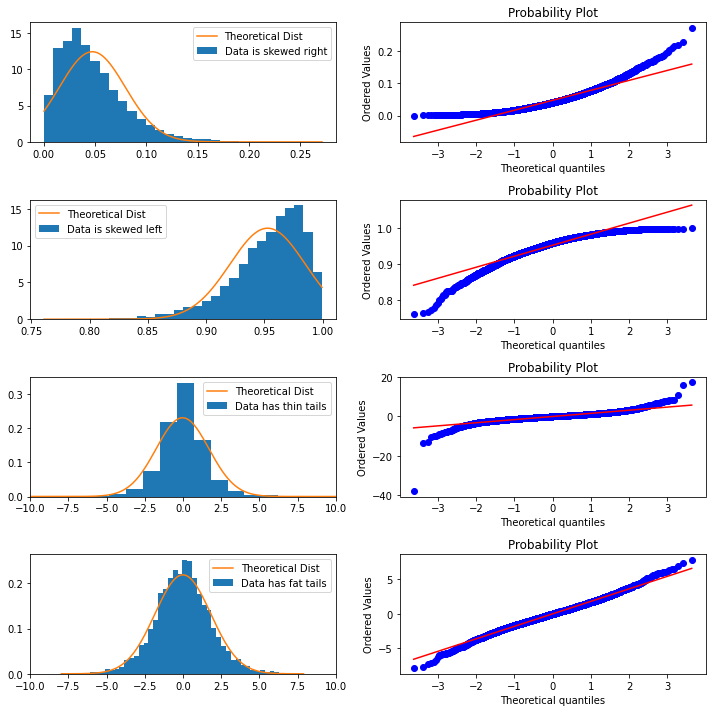

In [162]:
import numpy as np
skewRight = np.random.beta( 2,40, 5000 )
skewLeft  = np.random.beta( 40,2, 5000 )
TT        = np.random.standard_t(3, 5000)
FT        = np.random.logistic(0,1, 5000)


def TheoreticalDist(samples):
    dom = np.linspace( min(samples), max(samples), 1000 )
    
    mean   = np.mean(samples)
    sd     = np.std(samples)
    
    Theory = scipy.stats.norm( mean,sd ) 
    return dom,Theory
    
fig,axs = plt.subplots(4,2)

ax = axs[0,0]
ax.hist(skewRight,30, density=True, label="Data is skewed right")

dom,Theory = TheoreticalDist(skewRight) 
ax.plot(dom,Theory.pdf(dom),label="Theoretical Dist")

ax.legend()


ax = axs[0,1]
scipy.stats.probplot(skewRight,plot=ax)

#--------------------------------------------------------------
ax = axs[1,0]
ax.hist(skewLeft,30,density=True,label="Data is skewed left")

dom,Theory = TheoreticalDist(skewLeft) 
ax.plot(dom,Theory.pdf(dom),label="Theoretical Dist")

ax.legend()


ax = axs[1,1]
scipy.stats.probplot(skewLeft,plot=ax)


#--------------------------------------------------------------
ax = axs[2,0]
ax.hist(TT,50,density=True,label="Data has thin tails")

dom,Theory = TheoreticalDist(TT) 
ax.plot(dom,Theory.pdf(dom),label="Theoretical Dist")

ax.set_xlim(-10,10)

ax.legend()

ax = axs[2,1]
scipy.stats.probplot(TT,plot=ax)

#--------------------------------------------------------------
ax = axs[3,0]
ax.hist(FT,50,density=True,label="Data has fat tails")

dom,Theory = TheoreticalDist(FT) 
ax.plot(dom,Theory.pdf(dom),label="Theoretical Dist")

ax.set_xlim(-10,10)

ax.legend()

ax = axs[3,1]
scipy.stats.probplot(FT,plot=ax)


fig.set_size_inches(10,10)
fig.set_tight_layout(True)


### E assumption

We can test the **E** assumption, the assumption of equal variance, by plotting for every data point the predicted value versus the residual. This type of plot is usually called a *residual plot*. 
A residual plot that has an equal spread of points over predicted values supports our assumption of equal variance. 
A residual plot that has unequal spread does **not** support our equal variance assumption. 

For our dataset,

Text(0, 0.5, 'Residuals ($\\epsilon$)')

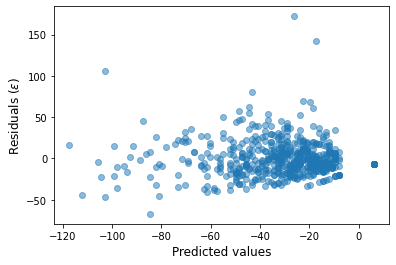

In [168]:
predictedValues = 6.20 - 1.30*d["total_health_care_worker_cases"]

fig,ax = plt.subplots()
ax.scatter(predictedValues,epsilons,alpha=0.50)

ax.set_xlabel("Predicted values"       ,fontsize=12)
ax.set_ylabel(r"Residuals ($\epsilon$)",fontsize=12)

Because there appears to be an equal spread over predicted values, the E assumption is supported. Though there are some extremly large residual values that may be worth investigating.